In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={"Age": "age", "Annual Income (k$)": "income", "Spending Score (1-100)": "score"},inplace=True)
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID    0
Gender        0
age           0
income        0
score         0
dtype: int64

In [6]:
df.drop('CustomerID',axis=1,inplace=True)
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Visualization

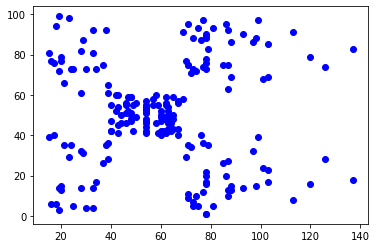

In [12]:
plt.plot(df.income,df.score,'bo')

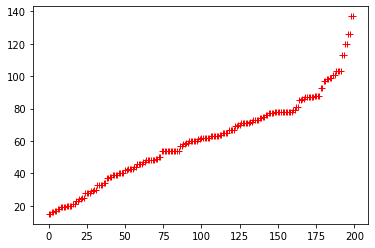

In [11]:
plt.plot(df.income,'r+')

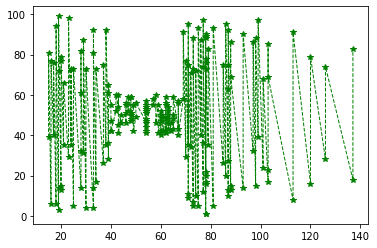

In [19]:
plt.plot(df.income, df.score, color='green', marker='*', linestyle='dashed',linewidth=1, markersize=6)

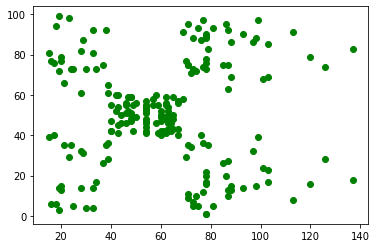

In [22]:
plt.scatter(df.income,df.score,color='green')

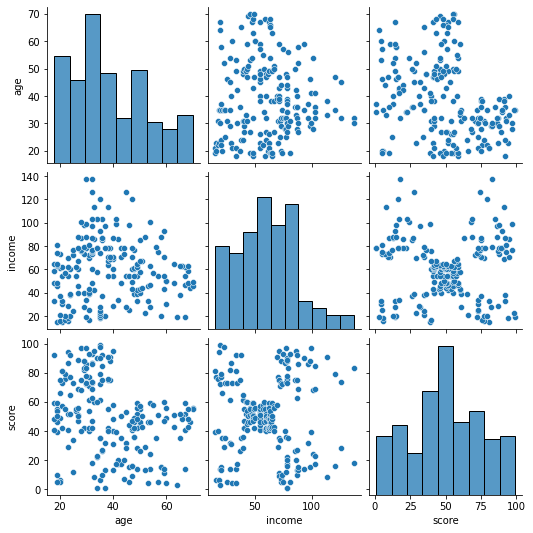

In [27]:
sns.pairplot(df[['age','income','score']])

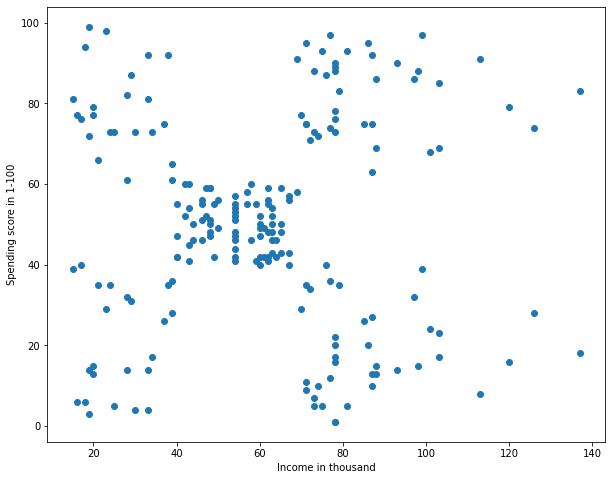

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel('Income in thousand')
plt.ylabel('Spending score in 1-100')
plt.scatter(df.income,df.score)
plt.show()

# KMeans Cluster

In [33]:
from sklearn.cluster import KMeans
km1 = KMeans()   #n_clusters = 8  ;which is default
predicted = km1.fit_predict(df[['income','score']])
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 6, 6,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 6, 1, 6, 6, 1, 1, 6, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 2, 1, 2, 7, 2, 7, 2,
       1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 1, 2, 7, 2, 1, 2, 7, 2, 7, 2, 7, 2,
       7, 2, 7, 2, 7, 2, 1, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2, 7, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5])

In [34]:
df['initial_cluster']=predicted
df.head()

,Gender,age,income,score,initial_cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [35]:
center1=km1.cluster_centers_
print(center1)

[[109.7         22.        ]
 [ 62.58333333  47.29166667]
 [ 78.55172414  82.17241379]
 [ 25.14285714  19.52380952]
 [ 25.0952381   80.04761905]
 [109.7         82.        ]
 [ 45.97368421  51.26315789]
 [ 79.73913043  13.39130435]]


In [36]:
km1.predict([[15,81]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

# 2D Vizualization

In [38]:
df[df['initial_cluster']==0]

,Gender,age,income,score,initial_cluster
180,Female,37,97,32,0
182,Male,46,98,15,0
184,Female,41,99,39,0
186,Female,54,101,24,0
188,Female,41,103,17,0
190,Female,34,103,23,0
192,Male,33,113,8,0
194,Female,47,120,16,0
196,Female,45,126,28,0
198,Male,32,137,18,0


In [42]:
df0 = df[df['initial_cluster']==0]
df1 = df[df['initial_cluster']==1]
df2 = df[df['initial_cluster']==2]
df3 = df[df['initial_cluster']==3]
df4 = df[df['initial_cluster']==4]
df5 = df[df['initial_cluster']==5]
df6 = df[df['initial_cluster']==6]
df7 = df[df['initial_cluster']==7]

print(f"df0 size = {df0.shape}")
print(f"df1 size = {df1.shape}")
print(f"df2 size = {df2.shape}")
print(f"df3 size = {df3.shape}")
print(f"df4 size = {df4.shape}")
print(f"df5 size = {df5.shape}")
print(f"df6 size = {df6.shape}")
print(f"df7 size = {df7.shape}")

df0 size = (10, 5)
df1 size = (48, 5)
df2 size = (29, 5)
df3 size = (21, 5)
df4 size = (21, 5)
df5 size = (10, 5)
df6 size = (38, 5)
df7 size = (23, 5)


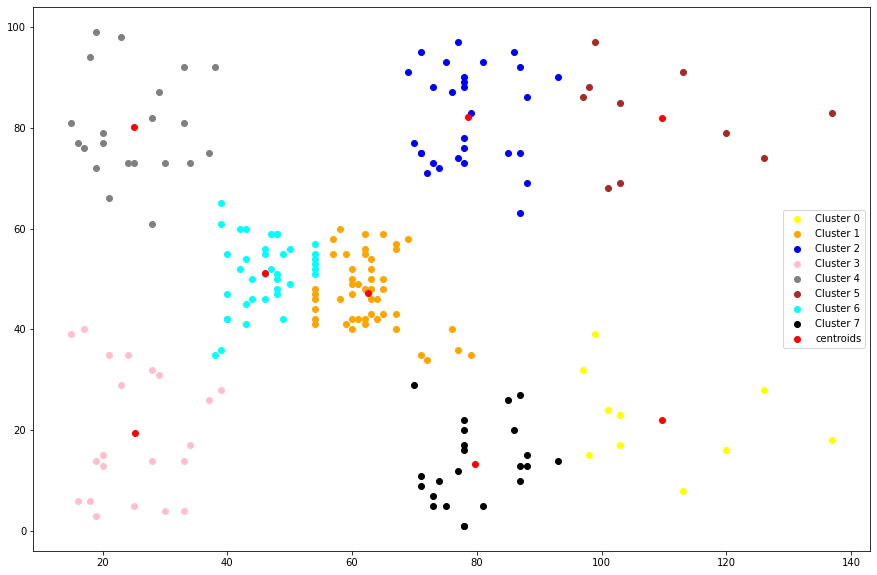

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(df0['income'],df0['score'],color='yellow',label='Cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='Cluster 1')
plt.scatter(df2['income'],df2['score'],color='blue',label='Cluster 2')
plt.scatter(df3['income'],df3['score'],color='pink',label='Cluster 3')
plt.scatter(df4['income'],df4['score'],color='grey',label='Cluster 4')
plt.scatter(df5['income'],df5['score'],color='brown',label='Cluster 5')
plt.scatter(df6['income'],df6['score'],color='cyan',label='Cluster 6')
plt.scatter(df7['income'],df7['score'],color='black',label='Cluster 7')

#centroids
plt.scatter(center1[:,0],center1[:,1], color='red', label = 'centroids')
plt.legend()
plt.show()

# Optimization

In [51]:
#Elbow method
#wcss = within clusters sum of squares

wcss = []
clusters = range(1,15)
for k in clusters:
    km2=KMeans(n_clusters=k)
    km2.fit(df[['income','score']])
    wcss.append(km2.inertia_)


wcss

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25094.432930794697,
 21818.11458845218,
 20041.9908486862,
 17844.59134199134,
 16049.714149902386,
 14381.05230880231,
 13051.267569833271]

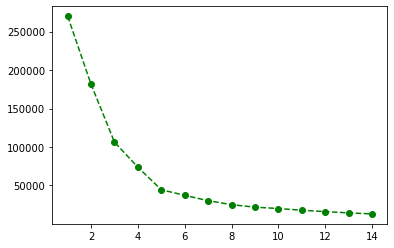

In [52]:
plt.plot(clusters,wcss,'go--')

In [53]:
!pip install kneed

In [54]:
from kneed import KneeLocator

In [59]:
kn = KneeLocator(clusters,wcss,curve='convex',direction='decreasing')
kn.knee

5

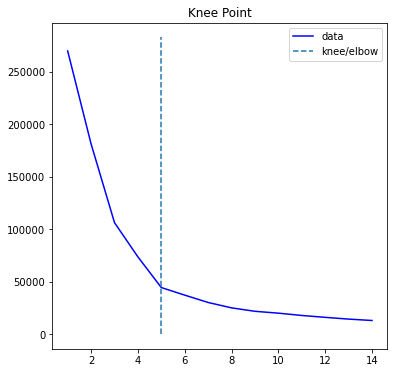

In [60]:
kn.plot_knee()

# With optimal number of clusters

In [61]:
km3=KMeans(n_clusters=5)
predicted = km3.fit_predict(df[['income','score']])
df['initial_cluster'] = predicted
center1 = km3.cluster_centers_

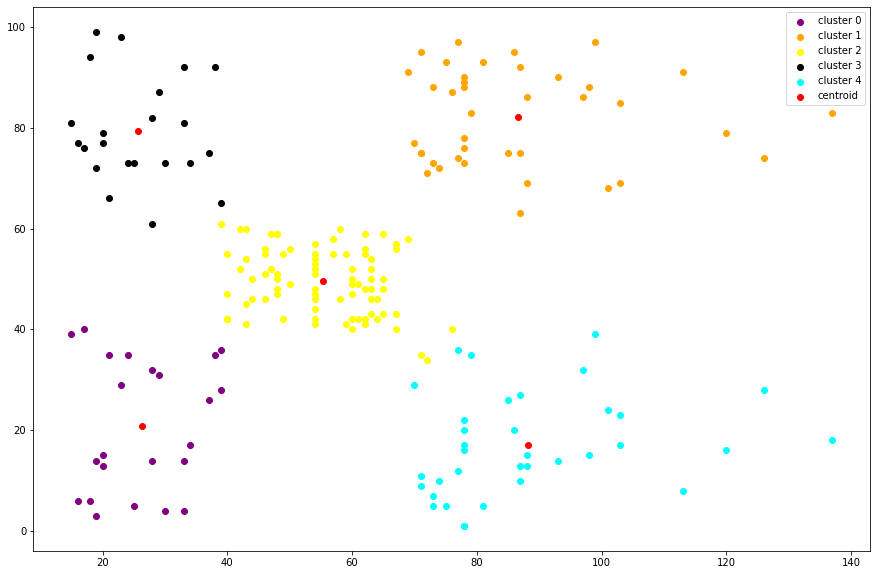

In [66]:
df0 = df[df['initial_cluster']==0]
df1 = df[df['initial_cluster']==1]
df2 = df[df['initial_cluster']==2]
df3 = df[df['initial_cluster']==3]
df4 = df[df['initial_cluster']==4]

plt.figure(figsize=(15,10))

plt.scatter(df0['income'],df0['score'],color='purple',label='cluster 0')
plt.scatter(df1['income'],df1['score'],color='orange',label='cluster 1')
plt.scatter(df2['income'],df2['score'],color='yellow',label='cluster 2')
plt.scatter(df3['income'],df3['score'],color='black',label='cluster 3')
plt.scatter(df4['income'],df4['score'],color='cyan',label='cluster 4')

plt.scatter(center1[:,0],center1[:,1],color='red',label='centroid')
plt.legend()
plt.show()